In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [157]:
dataset = pd.read_csv("titanic_dataset.csv", index_col="PassengerId")
dataset_shape = dataset.shape
dataset_features = list(dataset.columns)
dataset_info = dataset.describe()

In [158]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [159]:
dataset.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [160]:
print(f"Rows: {dataset_shape[0]} And Columns: {dataset_shape[1]}\n")
print("Features: ", dataset_features, end="\n\n")
dataset_info

Rows: 891 And Columns: 11

Features:  ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']



,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [161]:
dataset.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [162]:
total_passengers = dataset_shape[0]
survived = dataset["Survived"].sum()
dead = total_passengers - survived
print("Total Passengers: ", total_passengers)
print("Survived: ", survived)
print("Dead: ", dead)

Total Passengers:  891
Survived:  342
Dead:  549


In [163]:
dataset["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [164]:
survived_males = dataset.loc[dataset["Sex"] == "male"]["Survived"].sum()
print("Total Survived Male: ", survived_males)
print("Total Survived Female: ", survived - survived_males)

Total Survived Male:  109
Total Survived Female:  233


In [165]:
survived_females = dataset.loc[dataset["Sex"] == "female"]["Survived"].sum()
print("Total Survived Female: ", survived_females)
print("Total Survived Male: ", survived - survived_females)

Total Survived Female:  233
Total Survived Male:  109


In [166]:
rate_male = survived_males / survived
rate_female = survived_female / survived
print("Chances Of Survivel If You Were Male", rate_male)
print("Chances Of Survivel If You Were Female", rate_female)

Chances Of Survivel If You Were Male 0.31871345029239767
Chances Of Survivel If You Were Female 0.6812865497076024


# *Correlation*

### $$ \rho _{XY} = corr(X, Y)$$
### $$ -1.0 \leq \rho _{XY} \leq + 1.0$$

<hr>
Here I try to measure correlation in data using Correlation coefficients.<br>
Correlation coefficientsare used to measure how strong a relationship is between two variables.<br>
Correlation coefficient formulas are used to find how strong a relationship is between data. <br>
The formulas return a value between -1 and 1, where:

- 1 indicates a strong positive relationship.
- -1 indicates a strong negative relationship.
- A result of zero indicates no relationship at all.


<center><img src="https://www.statisticshowto.com/wp-content/uploads/2012/10/pearson-2-small.png"></center>

In [167]:
dataset_sex_series = dataset["Sex"].replace(["male", "female"], [1, 0])    # Scaleing Sex Feature Column 
dataset["Survived"].corr(dataset_sex_series)

-0.543351380657755

## *Encoding Categorical Features*

In [178]:
new_dataset = dataset.drop(["Name", "Ticket", "Cabin"], axis=1)
new_dataset["Sex"].replace(["male", "female"], [1, 0], inplace=True)
new_dataset["Embarked"].replace(["C", "S", "Q"], [0, 1, 2], inplace=True)
correl = new_dataset.corr()         # Pearson Correlation Coefficients
correl

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.126753
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.307324
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.023175
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.042340
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.031095
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.035756
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.269588
Embarked,-0.126753,0.307324,0.023175,-0.042340,0.031095,-0.035756,-0.269588,1.000000


In [187]:
mask = np.zeros_like(correl)
tri_idx = np.triu_indices_from(mask)
mask[tri_idx] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

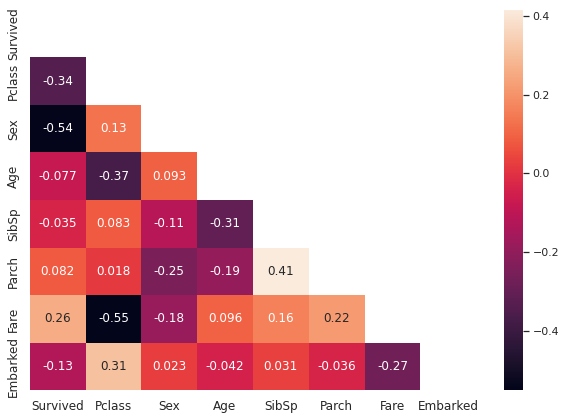

In [250]:
plt.figure(figsize=(10, 7))
sns.set_style("white")
sns.heatmap(correl, mask=mask, annot=True, annot_kws={"size": 12})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

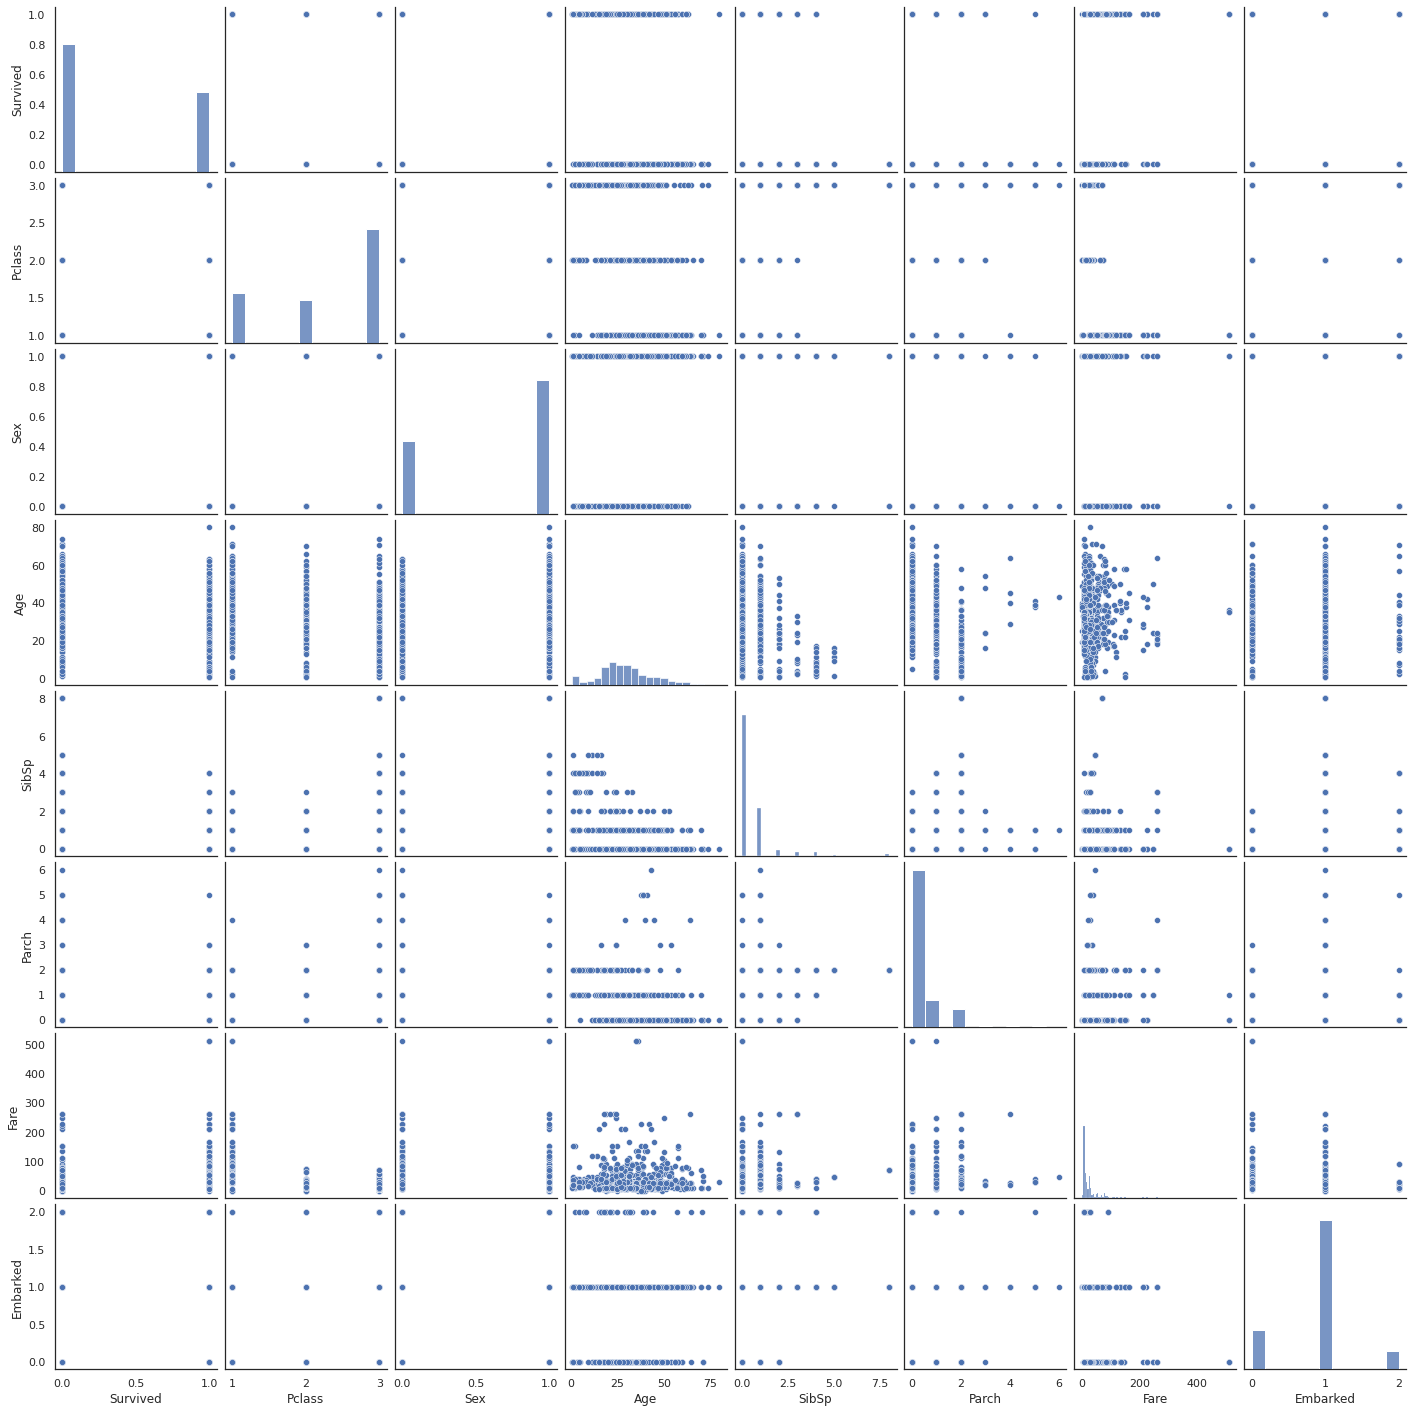

CPU times: user 16.7 s, sys: 102 ms, total: 16.8 s
Wall time: 17.8 s


In [252]:
%%time
sns.pairplot(new_dataset)
plt.show()

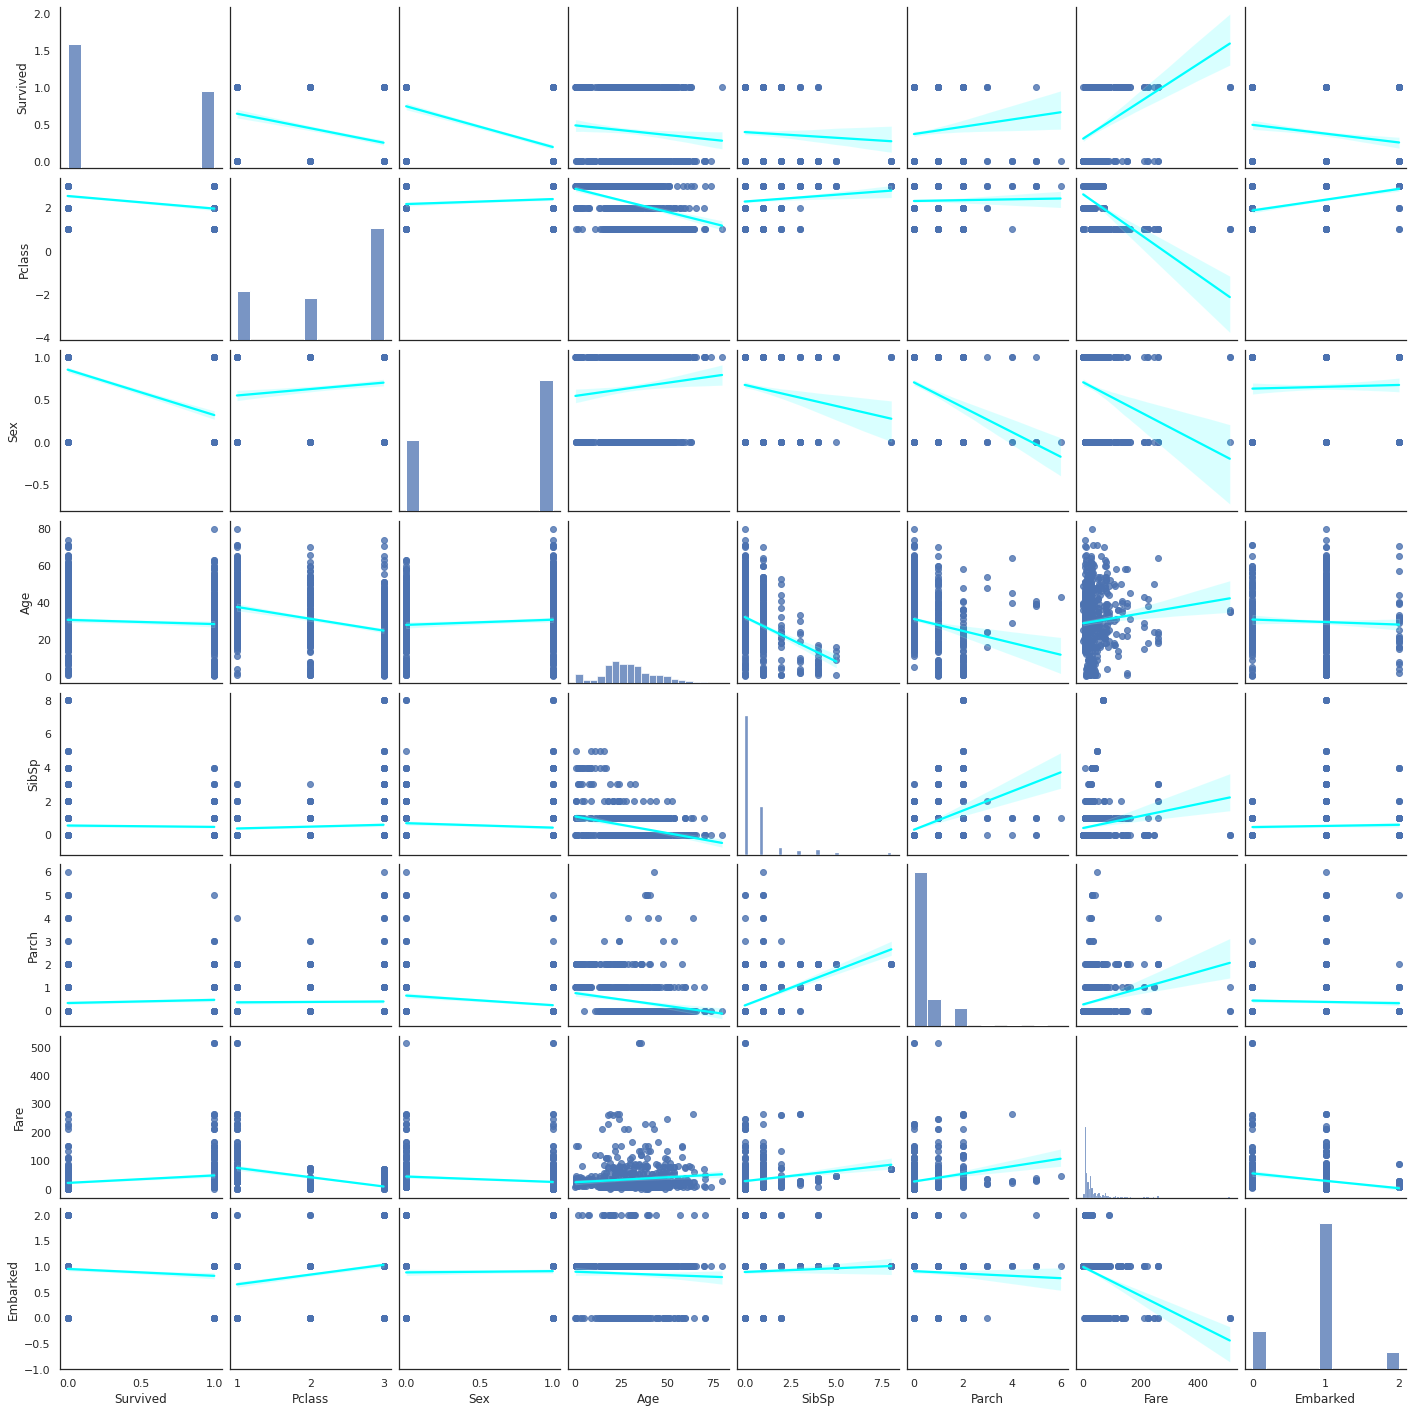

CPU times: user 57.5 s, sys: 1.34 s, total: 58.9 s
Wall time: 53.6 s


In [254]:
%%time
sns.pairplot(new_dataset, kind="reg", plot_kws={'line_kws': {'color': 'cyan'}})
plt.show()